In [10]:

#import necessary libraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score, accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/johnle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


turning all uppercase to lower


In [19]:
creat_sentance = WordNetLemmatizer() #group different form of a word together so that they can be analyzed as a single item
removeW = ['rt', 'retweet']
spword = set().union(stopwords.words('english'), removeW)

In [12]:
 # fix_word help removing single charater value, then turning them of to lower case and slit
 # then it removes stopwords, and also use lemmatize to break the sentance and rejoin them 
def fix_word(comment):
    nword = re.sub(r"[^a-zA-Z]", " ", comment)  
    nword = nword.lower() 
    nword = nword.split()
    final_word = [i for i in nword if i not in spword]
    final_sentence = [creat_sentance.lemmatize(z) for z in final_word]
    final_sentence = ' '.join(final_sentence)
    return final_sentence

In [20]:
#import the dataset
dataset = pd.read_csv('Tweets.csv')
dataset = shuffle(dataset) #mix up the data though still retain logical relationships between columns
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
6529,567800671572926464,negative,1.0,Cancelled Flight,1.0,Southwest,NaN,PCDan76,NaN,0,@SouthwestAir flight 1613 Cancelled Flightled?...,NaN,2015-02-17 13:40:03 -0800,Park City,NaN
1827,569567167429128192,positive,1.0,NaN,NaN,United,NaN,LuisCadena,NaN,0,@united your agents (and service) on my weeken...,NaN,2015-02-22 10:39:29 -0800,Earth,Central Time (US & Canada)
4098,567823510245236739,negative,1.0,Customer Service Issue,1.0,United,NaN,karalynnholt,NaN,1,@united we showed up to our flight several hou...,NaN,2015-02-17 15:10:49 -0800,San Antonio,Central Time (US & Canada)
10086,569541291467522048,negative,1.0,Late Flight,1.0,US Airways,NaN,jacove,NaN,0,@USAirways why now just announce delay of 4478...,NaN,2015-02-22 08:56:40 -0800,NaN,Eastern Time (US & Canada)
11521,568053728944791552,negative,1.0,longlines,1.0,US Airways,NaN,_MeAndMariah,NaN,0,@USAirways we're all standing here and no one ...,NaN,2015-02-18 06:25:37 -0800,where you want to be.,Eastern Time (US & Canada)


In [21]:
x = dataset.text.apply(fix_word)
y = dataset['airline_sentiment']
print(x)

6529     southwestair flight cancelled flightled wife s...
1827       united agent service weekend trip amazing thank
4098     united showed flight several hour early tried ...
10086    usairways announce delay pvd knew captain alre...
11521    usairways standing one saying anything likely ...
                               ...                        
346      virginamerica sent couple message email provid...
7785     jetblue send service agent stranded passenger ...
5714     southwestair loyal southwest beginning unhappy...
10415    usairways want clog already crowded line speci...
13193    americanair literally stopped allowing people ...
Name: text, Length: 14640, dtype: object


In [22]:
#Data Processing
vectorizer=CountVectorizer() #Encode as integers to be used for the algorithm
x_vectorized=vectorizer.fit_transform(x) #Learn the vocabulary dictionary and return document-term matrix.
print(x_vectorized)

  (0, 10084)	1
  (0, 3907)	1
  (0, 1524)	1
  (0, 3923)	1
  (0, 12063)	1
  (0, 10370)	1
  (0, 8106)	1
  (0, 11913)	1
  (0, 9909)	1
  (0, 9431)	1
  (0, 10753)	1
  (0, 6403)	1
  (0, 10083)	1
  (1, 11406)	1
  (1, 202)	1
  (1, 9664)	1
  (1, 11947)	1
  (1, 11126)	1
  (1, 367)	1
  (1, 10745)	1
  (2, 3907)	1
  (2, 11406)	1
  (2, 9782)	1
  (2, 9681)	1
  (2, 4987)	1
  :	:
  (14637, 2745)	1
  (14638, 11551)	1
  (14638, 338)	1
  (14638, 11873)	1
  (14638, 2956)	1
  (14638, 6251)	1
  (14638, 10040)	1
  (14638, 9045)	1
  (14638, 6704)	1
  (14638, 10061)	1
  (14638, 2369)	1
  (14638, 10116)	1
  (14638, 1911)	1
  (14638, 11670)	1
  (14639, 9664)	2
  (14639, 379)	1
  (14639, 11837)	1
  (14639, 328)	1
  (14639, 2428)	2
  (14639, 12183)	1
  (14639, 6251)	1
  (14639, 8031)	1
  (14639, 6276)	1
  (14639, 10313)	1
  (14639, 5277)	1


In [23]:
#Split between train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_vectorized, y, test_size=0.3, random_state=0)


In [24]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=25, criterion='gini')
#Hyperparameter Tuning using GridSearch
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
gs_dt = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
gs_dt.fit(x_train, y_train)
prediction1=gs_dt.predict(x_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [25]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(x_train, y_train)
#Hyperparameter Tuning using GridSearch
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
gs_lr=GridSearchCV(lr, params, n_jobs=1, cv=5)
gs_lr.fit(x_train, y_train)
prediction2=gs_lr.predict(x_test)

In [26]:
#Multi-layer perceptron Classifier
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(8, 8, 8), activation='relu', learning_rate_init=0.001, random_state=1, max_iter=500)
NN.fit(x_train, y_train)
prediction3=NN.predict(x_test);

Text(0.5, 1.0, 'Decision Tree - Accuracy Score: 0.708')

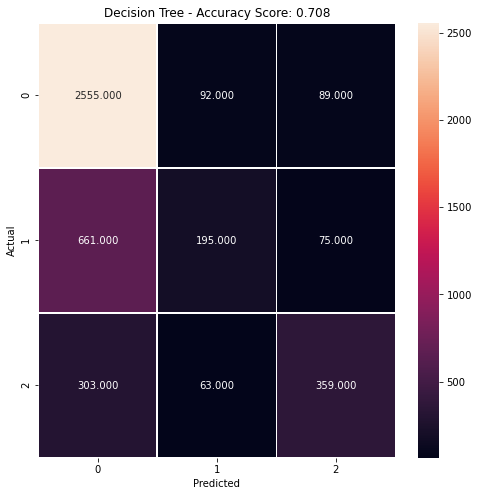

In [27]:
#Measure performance using Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm1=metrics.confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Decision Tree - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction1)
plt.title(title, size=12)


Text(0.5, 1.0, 'Logistic Regression - Accuracy Score: 0.775')

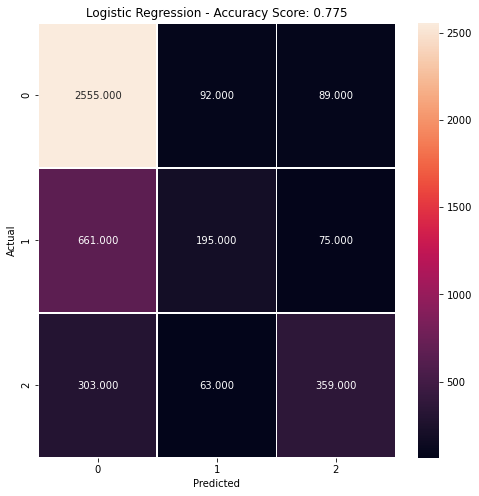

In [28]:
cm2=metrics.confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Logistic Regression - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction2)
plt.title(title, size=12)


Text(0.5, 1.0, 'Neural Network - Accuracy Score: 0.691')

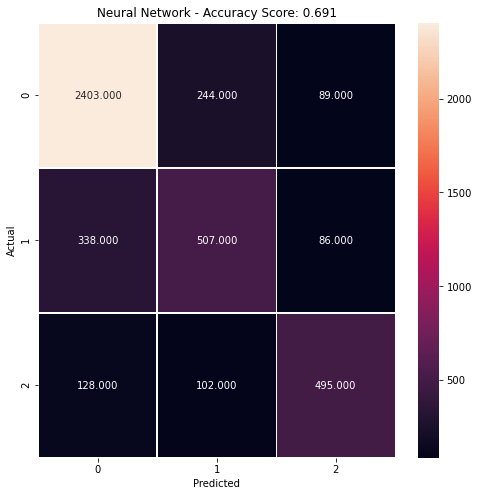

In [29]:
cm3=metrics.confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8,8))
sns.heatmap(cm2, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Neural Network - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction3)
plt.title(title, size=12)

In [30]:
#Out of the three, logistic regression has the highest accuracy
#Run some tests with logistic regression model
test_feature = vectorizer.transform([' this have being a very good day love the weather today'])
gs_lr.predict(test_feature)

array(['positive'], dtype=object)

In [31]:
test_feature = vectorizer.transform(['i am alright'])
gs_lr.predict(test_feature)

array(['neutral'], dtype=object)

In [32]:
test_feature = vectorizer.transform(['i hate this president he is not good'])
gs_lr.predict(test_feature)

array(['negative'], dtype=object)